In [1]:
import tensorflow as tf
import numpy as np

### RNN parameters

In [2]:
hidden_size = 5
input_dim = 5
batch_size = 1
sequence_length = 6

### Data creation

In [26]:
idx2char = ['h', 'i', 'e', 'l', 'o']
x_data = [[0, 1, 0, 2, 3, 3]]
x_one_hot = [[[1, 0, 0, 0, 0],   # h 0
              [0, 1, 0, 0, 0],   # i 1
              [1, 0, 0, 0, 0],   # h 0
              [0, 0, 1, 0, 0],   # e 2
              [0, 0, 0, 1, 0],   # l 3
              [0, 0, 0, 1, 0]]]  # l 3
y_data = [[1, 0, 2, 3, 3, 4]]

### Feed to RNN

In [4]:
X = tf.placeholder(tf.float32, [None, sequence_length, input_dim])
Y = tf.placeholder(tf.int32, [None, sequence_length])

In [5]:
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell, X, initial_state=initial_state, dtype=tf.float32)

### Cost: sequence_loss

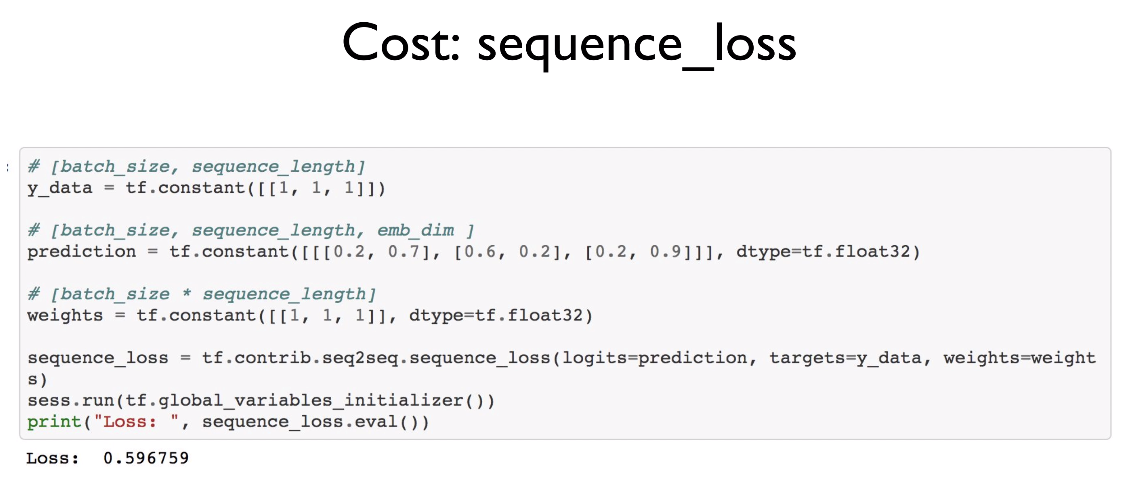

In [8]:
# [batch_size, sequence_length]
y_data = tf.constant([[1, 1, 1]])

# [batch_size, sequence_length, emb_dim]
prediction = tf.constant([[[0.2, 0.7], [0.6, 0.2], [0.2, 0.9]]], dtype=tf.float32)

# [batch_size * sequence_length]
# 위치 중요도를 설정
weights = tf.constant([[1, 1, 1]], dtype=tf.float32)

sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=prediction, targets=y_data, weights=weights)

In [9]:
sess = tf.Session()

In [10]:
sess.run(tf.global_variables_initializer())

In [13]:
print("Loss: ", sequence_loss.eval(session=sess))

Loss:  0.5967595


### Cost: sequence_loss_2

In [17]:
# [batch_size, sequence_length]
y_data = tf.constant([[1, 1, 1]])

# [batch_size, sequence_length, emb_dim]
prediction1 = tf.constant([[[0.3, 0.7], [0.3, 0.7], [0.3, 0.7]]], dtype=tf.float32)
prediction2 = tf.constant([[[0.1, 0.9], [0.1, 0.9], [0.1, 0.9]]], dtype=tf.float32)

# [batch_size * sequence_length]
# 위치 중요도를 설정
weights = tf.constant([[1, 1, 1]], dtype=tf.float32)

sequence_loss1 = tf.contrib.seq2seq.sequence_loss(logits=prediction1, targets=y_data, weights=weights)
sequence_loss2 = tf.contrib.seq2seq.sequence_loss(logits=prediction2, targets=y_data, weights=weights)

sess.run(tf.global_variables_initializer())
print("Loss1: ", sequence_loss1.eval(session=sess), "\nLoss2: ", sequence_loss2.eval(session=sess))

Loss1:  0.5130153 
Loss2:  0.3711007


In [18]:
weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

In [19]:
prediction = tf.argmax(outputs, axis=2)

In [27]:
y_data = [[1, 0, 2, 3, 3, 4]]

In [28]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        l, _ = sess.run([loss, train], feed_dict={X: x_one_hot, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_one_hot})
        print(i, "loss: ", l, "prediction: ", result, "true Y: ", y_data)
        
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print("\tPrediction str: ", "".join(result_str))

0 loss:  1.6273584 prediction:  [[2 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  elllll
1 loss:  1.5297393 prediction:  [[2 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  elllll
2 loss:  1.4522429 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
3 loss:  1.3986226 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
4 loss:  1.3444914 prediction:  [[2 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  elllll
5 loss:  1.2817205 prediction:  [[2 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  elllll
6 loss:  1.2286462 prediction:  [[2 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  elllll
7 loss:  1.1772672 prediction:  [[2 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  elllll
8 loss:  1.1336038 prediction:  [[2 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  elllll
9 loss:  1.1021706 prediction:  [[2 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3,

105 loss:  0.672201 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
106 loss:  0.6720374 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
107 loss:  0.67187715 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
108 loss:  0.67172027 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
109 loss:  0.6715663 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
110 loss:  0.67141557 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
111 loss:  0.67126757 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
112 loss:  0.67112225 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
113 loss:  0.6709797 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
114 loss:  0.6708396 prediction:  [[1 0 2 3 3 4]] t

211 loss:  0.66318125 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
212 loss:  0.66313404 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
213 loss:  0.66308707 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
214 loss:  0.6630405 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
215 loss:  0.6629943 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
216 loss:  0.6629484 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
217 loss:  0.66290295 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
218 loss:  0.6628578 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
219 loss:  0.6628129 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
220 loss:  0.6627684 prediction:  [[1 0 2 3 3 4]] t

317 loss:  0.659554 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
318 loss:  0.659529 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
319 loss:  0.65950406 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
320 loss:  0.6594793 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
321 loss:  0.6594546 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
322 loss:  0.65943 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
323 loss:  0.6594055 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
324 loss:  0.6593812 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
325 loss:  0.659357 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
326 loss:  0.65933293 prediction:  [[1 0 2 3 3 4]] true Y: 

422 loss:  0.6573928 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
423 loss:  0.6573747 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
424 loss:  0.6573567 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
425 loss:  0.65733856 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
426 loss:  0.65732044 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
427 loss:  0.65730226 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
428 loss:  0.6572841 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
429 loss:  0.65726584 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
430 loss:  0.6572475 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
431 loss:  0.6572292 prediction:  [[1 0 2 3 3 4]] t

531 loss:  0.6343748 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
532 loss:  0.6343588 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
533 loss:  0.6343432 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
534 loss:  0.6343278 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
535 loss:  0.6343127 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
536 loss:  0.6342978 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
537 loss:  0.634283 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
538 loss:  0.63426846 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
539 loss:  0.63425404 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
540 loss:  0.63424 prediction:  [[1 0 2 3 3 4]] true Y

	Prediction str:  ihello
646 loss:  0.63311213 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
647 loss:  0.6331035 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
648 loss:  0.6330947 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
649 loss:  0.633086 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
650 loss:  0.63307744 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
651 loss:  0.63306886 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
652 loss:  0.6330602 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
653 loss:  0.6330517 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
654 loss:  0.6330431 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
655 loss:  0.6330345 predict

756 loss:  0.63227344 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
757 loss:  0.6322668 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
758 loss:  0.6322601 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
759 loss:  0.6322534 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
760 loss:  0.63224673 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
761 loss:  0.6322401 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
762 loss:  0.63223344 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
763 loss:  0.63222694 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
764 loss:  0.6322202 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
765 loss:  0.63221365 prediction:  [[1 0 2 3 3 4]] 

866 loss:  0.63160944 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
867 loss:  0.63160396 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
868 loss:  0.6315985 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
869 loss:  0.63159305 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
870 loss:  0.6315876 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
871 loss:  0.6315822 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
872 loss:  0.63157684 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
873 loss:  0.6315715 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
874 loss:  0.63156605 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
875 loss:  0.6315606 prediction:  [[1 0 2 3 3 4]] 

973 loss:  0.6310735 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
974 loss:  0.63106877 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
975 loss:  0.6310642 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
976 loss:  0.6310596 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
977 loss:  0.631055 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
978 loss:  0.6310504 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
979 loss:  0.6310459 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
980 loss:  0.63104135 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
981 loss:  0.63103676 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
982 loss:  0.6310322 prediction:  [[1 0 2 3 3 4]] tru

1086 loss:  0.6305909 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1087 loss:  0.630587 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1088 loss:  0.63058305 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1089 loss:  0.63057905 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1090 loss:  0.6305751 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1091 loss:  0.6305712 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1092 loss:  0.63056725 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1093 loss:  0.6305633 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1094 loss:  0.6305594 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1095 loss:  0.63055557 prediction:  [[1 0 2 

1196 loss:  0.6301827 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1197 loss:  0.6301792 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1198 loss:  0.63017577 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1199 loss:  0.6301723 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1200 loss:  0.63016886 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1201 loss:  0.6301654 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1202 loss:  0.63016194 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1203 loss:  0.6301585 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1204 loss:  0.630155 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1205 loss:  0.63015157 prediction:  [[1 0 2 

1304 loss:  0.62982744 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1305 loss:  0.62982434 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1306 loss:  0.62982124 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1307 loss:  0.6298181 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1308 loss:  0.629815 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1309 loss:  0.62981194 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1310 loss:  0.6298088 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1311 loss:  0.62980574 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1312 loss:  0.62980264 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1313 loss:  0.62979954 prediction:  [[1 0

1414 loss:  0.6295025 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1415 loss:  0.6294996 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1416 loss:  0.6294968 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1417 loss:  0.629494 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1418 loss:  0.62949127 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1419 loss:  0.6294884 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1420 loss:  0.62948567 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1421 loss:  0.6294828 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1422 loss:  0.62948006 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1423 loss:  0.6294772 prediction:  [[1 0 2 3

1518 loss:  0.6292231 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1519 loss:  0.62922055 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1520 loss:  0.62921804 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1521 loss:  0.6292155 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1522 loss:  0.6292129 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1523 loss:  0.62921035 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1524 loss:  0.6292078 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1525 loss:  0.6292052 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1526 loss:  0.62920266 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1527 loss:  0.62920016 prediction:  [[1 0 

1624 loss:  0.62896204 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1625 loss:  0.62895966 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1626 loss:  0.62895733 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1627 loss:  0.62895495 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1628 loss:  0.62895256 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1629 loss:  0.6289502 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1630 loss:  0.6289479 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1631 loss:  0.6289455 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1632 loss:  0.62894315 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1633 loss:  0.6289408 prediction:  [[1 0

1729 loss:  0.6287234 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1730 loss:  0.6287212 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1731 loss:  0.62871903 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1732 loss:  0.6287169 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1733 loss:  0.6287147 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1734 loss:  0.6287125 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1735 loss:  0.6287103 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1736 loss:  0.6287081 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1737 loss:  0.628706 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1738 loss:  0.6287038 prediction:  [[1 0 2 3 3

1829 loss:  0.62851244 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1830 loss:  0.62851036 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1831 loss:  0.6285084 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1832 loss:  0.62850636 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1833 loss:  0.62850434 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1834 loss:  0.6285023 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1835 loss:  0.6285003 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1836 loss:  0.62849826 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1837 loss:  0.6284962 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1838 loss:  0.62849414 prediction:  [[1 0

	Prediction str:  ihello
1929 loss:  0.6283158 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1930 loss:  0.62831384 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1931 loss:  0.62831193 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1932 loss:  0.6283101 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1933 loss:  0.62830824 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1934 loss:  0.6283063 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1935 loss:  0.6283044 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1936 loss:  0.62830245 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1937 loss:  0.6283006 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
1938 loss:  0.628